Available Themes: 
- chesterish
- grade3
- gruvboxd
- gruvboxl
    color beach, letras negras
- monokai
- oceans16
- onedork
- solarizedd
- solarizedl
    color beach mas claro

In [1]:
# !jt -l
# !jt -t solarizedl -T
# !jt -r

# Inicio



__Rename__
Recordar que la columna llamada

- `Precio promedio` ahora es `Precio`
- `Centro.1` ahora es `Centro`
- `Centro` ahora es `Centro_Cod`

Presenta los parametros del modelo:

- Dirección datos
- Dirección Graficos
- _Material a analizar_
- _Canal a analizar_
- _Zona de los Datos_
- _Año de inicio de analizis_

Base de datos


`Tipo_de_Cliente`
`Y_producto`
`Año_inicio`

`file_direct_Graphic` 

## Parametros 
data frame `data_i`


> - Producto `i_producto = Y_producto`
> -Para el Canal `Tipo_de_Cliente`
> -Variable a predecir/Grafico `Y_Variable`

Columnas de interes para predecir `X_col`

Diccionario del grupo de columnas `Dic_col`

In [2]:
#===================================
# Archivo
#===================================
Zona_df='Z001'

#===================================
# Clientes
#===================================
Tipo_de_Cliente='Tradicional'

#===================================
# Producto de interes
#===================================
Y_producto='1010078'


#===================================
# Año de Partida
#===================================
Año_inicio='2018'




# Ordenador de escritorio
"""
file_direct_O="C:/Users/user/Documents/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/user/Documents/Data/Data Clear/"
file_direct_Graphic='C:/Users/user/Documents/Graficos'
Png_file_direct_Graphic="C:\\Users\\user\\Documents\\Graficos"
file_direct_Result_Data="C:/Users/user/Documents/Data/Data Resultante/"+Zona_df+"/"
"""

#Notebook
file_direct_O="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"
file_direct_Graphic='C:/Users/rolft/Documents/Repositorios/Graficos'
Png_file_direct_Graphic='C:\\Users\\rolft\\Documents\\Repositorios\\Graficos'

#Graficos
file_direct_Graphic_Canal=file_direct_Graphic+"/"+Tipo_de_Cliente
file_direct_Graphic_Canal_Material=file_direct_Graphic_Canal+'/'+Y_producto

Png_file_direct_Graphic_Canal=Png_file_direct_Graphic+'\\'+'Canal '+Tipo_de_Cliente
Png_file_direct_Graphic_Canal_Material=Png_file_direct_Graphic_Canal+'\\'+Y_producto


## Intalar paquetes, Abrir data y ajustarla 

#### Base Generales

In [3]:
#from adjustText import adjust_text
# from adjustText import *

In [4]:
#=====================================================
                # BASE 
#-----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

In [5]:
#=====================================================
                # sklearn 
#-----------------------------------------------------

#Separador de datos en train/test
from sklearn.model_selection import train_test_split

#Prediccion Ridge Regression
from sklearn.linear_model import Ridge

In [6]:
#=====================================================
                # statsmodels 
#-----------------------------------------------------
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning


#from statsmodels.regression.mixed_linear_model import MixedLMResults
# No se para qué sirve este

In [7]:
#====================================================
#librerias para crear division de series temporales
#====================================================

from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [8]:
# stopwatch
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec),'\n H:m:s')
#==================================
#          Example
#    input("Press Enter to start")
start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================

In [9]:
#Histograma con porcentajes
from mizani.formatters import percent_format

### Propios

In [10]:
import data_read as dr
import R_FM_Func

### Funciones Propias
```python
#Mes_name
data_i.Mes.apply(Mes_name)
```
>Transforma la columna mes numerica en el nombre del mes

#### Numero a Meses 

__Forma de crear una etiqueta para un valor especifico__
```python
#[Y_Graph]
dfz=df.copy()
dfz['Año select']=dfz.apply( lambda x: x['Año'] if x['Año']==2020 else '',axis=1)
dfz
```

In [11]:
#===================================
# Dicionario MES
#===================================

#===================================
# Fecha
D=['Enero','Febrero','Marzo','Abril',
 'Mayo','Junio','Julio','Agosto',
 'Septiembre','Octubre',
 'Noviembre','Diciembre']
Month_dic={i:D[i-1]  for i in range(1,13)}
#===========================================


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])

#### Función estandariza ciertas columnas a LN 

In [12]:
# ['Frecuency Actual del Cliente','Monetary Actual']
def data_ln(dx,ln_col,drop_columns):
    """
    Pasa un listado de columnas a Ln
    
        dx: dataframe
        ln_col: (Array) Listado de columnas a escalar 
        drop_columns: (True or False)  Eliminar columnas del listado
    """
    df_x=dx.copy()
    for s in ln_col:
        if(s in df_x.columns):
            print(s)
            df_x[s + '(Escala ln)']=\
            df_x[s].apply(lambda x: np.log(x))
    if(drop_columns):
        df_x.drop(columns = ln_col)
    return(df_x)

## Dicionario 
rename aplicado a `Precio promedio`

In [13]:
Dic_col={'Base':
                             ['Material (Nombre)', 'Kilos Venta KG', 'Precio','Cliente'],
        'Fecha':
                             ['Día natural','Día Semana','Semana', 'Mes', 'Año'],
        'Ubicacion':
                             ['Centro','Población'],
        'Cliente Categoria':
                             ['Cluster','Segmento.1', 'Categoría Cliente'],
        'Cliente Atributos':
                             ['Año Creación', 'Material Favorito','Frecuencia Historica'] 
         ,'RFM Row':
                 ['Recency días','Frecuency_Row','Monetary']
        ,'RFM Customers':
                 ['Recency Actual','Frecuency Actual del Cliente','Monetary Actual']
        ,'Ticket Row':
                 ['Ticket Promedio','Ticket CV']
        ,'Ticket Customers':
                 ['Ticket Promedio Actual','Ticket CV Actual']
        }

### Colores 

[Link colores muestra y configuración](https://www.rapidtables.com/web/color/RGB_Color.html)

In [14]:
('{:X}{:X}{:X}').format(31, 119, 180)
('{:X}{:X}{:X}').format(219, 96, 97)
('{:X}{:X}{:X}').format(87, 219, 95)

'57DB5F'

## Datos
- `data_rfm`: Facturaciones 
- `Data_Customers_Full`: Clientes con todos los atributos
<!-- - `Df_Week`: Semanas, Con su respectivo cluster  -->

### Factuas con Week Tipe
`data_rfm`

In [15]:
data_rfm=dr.RFM_Data_func(file_direct_O)
data_rfm=dr.Ajuste_data_RFM(data_rfm)
data_rfm=dr.Merge_Week(file_direct_O,data_rfm)


C:/Users/rolft/Documents/Repositorios/Data/Data Clear/Z001/data_1010078_CT R.csv
R (198596, 19)
C:/Users/rolft/Documents/Repositorios/Data/Data Clear/Z001/data_1010078_CT F.csv
F (198596, 19)
C:/Users/rolft/Documents/Repositorios/Data/Data Clear/Z001/data_1010078_CT M.csv
M (198596, 20)
------------------------------------------------
Merge
RF (198596, 20)
RFM (198596, 22)
Material (Nombre)       object
Kilos Venta KG           int64
Precio                   int64
Día natural             object
Día Semana              object
Semana                  object
Mes                     object
Año                     object
Población               object
Centro                  object
Cliente                 object
Cluster                 object
Segmento.1              object
Categoría Cliente       object
Año Creación            object
Material Favorito       object
Frecuencia Historica    object
Mes_num                 object
Recency                 object
Frecuency_Row            int64
Ingr

### Data Clientes
`Data_Customers_Full`


#### RFM
`Customers_data`

In [16]:
Customers_data=dr.Customers_csv_RFM(file_direct_O)
Customers_data=dr.Ajuste_Clientes_RFM(Customers_data)
print(Customers_data.shape)
Customers_data.head()

Cliente                           object
Fecha ultima Compra               object
Recency Actual                     int64
Fecha Creacion                    object
Frecuency Actual del Cliente     float64
Kilos Venta KG Promedio          float64
Precio Promedio                  float64
Año Creación Promedio              int64
Frecuencia Historica Promedio      int64
Ingreso de Venta Promedio        float64
dtype: object
(5073, 10)


,Cliente,Fecha ultima Compra,Recency Actual,Fecha Creacion,Frecuency Actual del Cliente,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Monetary Actual
0,10003742,2020-05-23,521,2020-05-23,0.003344,22.000000,1300.000000,2007,19,28600.000000
1,10007508,2021-10-26,0,2018-03-01,0.201752,93.158654,1266.894231,2007,464,117683.471154
2,10017269,2021-10-23,3,2018-01-27,0.059365,22.038462,1347.782051,2007,101,29699.448718
3,10023880,2021-09-09,47,2018-12-28,0.039591,27.500000,1400.000000,2007,383,38390.000000
4,10028999,2021-09-24,32,2019-11-05,0.017541,22.000000,1320.923077,2007,62,29060.307692


### Val
`df_VC`

In [17]:
df_VC=dr.Val_Clientes_weeks(file_direct_O)

Cliente                                         object
%△Valoración Promedio \n Tipo de Semana 0      float64
%△Valoración Promedio \n Tipo de Semana 1      float64
%△Valoración Promedio \n Tipo de Semana 2      float64
%△Valoración Promedio \n Tipo de Semana 3      float64
%△Valoración Promedio \n Tipo de Semana 4      float64
Kilos Venta KG Promedio \n Tipo de Semana 0    float64
Kilos Venta KG Promedio \n Tipo de Semana 1    float64
Kilos Venta KG Promedio \n Tipo de Semana 2    float64
Kilos Venta KG Promedio \n Tipo de Semana 3    float64
Kilos Venta KG Promedio \n Tipo de Semana 4    float64
dtype: object


### Data Customers Full
`Data_Customers_Full`

In [18]:
print(df_VC.shape
,Customers_data.shape
,len(data_rfm.Cliente.unique()))
Data_Customers_Full=dr.Customer_KG_Mean(data_rfm,Customers_data,df_VC)
print(Data_Customers_Full.shape)
(Data_Customers_Full.dtypes)

(5073, 11) (5073, 10) 5073
Cliente                0
Ticket std Actual    367
dtype: int64
(5073, 13)
(5073, 23)
(5073, 24)
(5073, 24)


Cliente                                         object
%△Valoración Promedio \n Tipo de Semana 0      float64
%△Valoración Promedio \n Tipo de Semana 1      float64
%△Valoración Promedio \n Tipo de Semana 2      float64
%△Valoración Promedio \n Tipo de Semana 3      float64
%△Valoración Promedio \n Tipo de Semana 4      float64
Kilos Venta KG Promedio \n Tipo de Semana 0    float64
Kilos Venta KG Promedio \n Tipo de Semana 1    float64
Kilos Venta KG Promedio \n Tipo de Semana 2    float64
Kilos Venta KG Promedio \n Tipo de Semana 3    float64
Kilos Venta KG Promedio \n Tipo de Semana 4    float64
Fecha ultima Compra                             object
Recency Actual                                   int64
Fecha Creacion                                  object
Frecuency Actual del Cliente                   float64
Kilos Venta KG Promedio                        float64
Precio Promedio                                float64
Año Creación Promedio                            int64
Frecuencia

# Data solo RFM  

`RFM_Customers=Clientes_i_RFM[['Cliente']+Dic_col['RFM Customers']].copy()`


- `Estado_R(x):` función de apply
- `DF_Estado_R(DF):` Función modifica recency
- `Df_Pond_FxM(RFM_df ,  Col_FM , weighted_F,weighted_M):`

#### Apuntes 

##### Funciones
1. Ajuste De Datos
   - Estado R
     - `Estado_R(X)` por apply
     - DF_Estado_R(DF) ajusta directamnte el DF ingresado
   - `data_Min_Max(dx,Min_Max_col,drop_columns)`
     > Entrega un df copiado
     >> Ajusta las columnas del arreglo Min_Max_col
     
     - dx dataframe
     - Min_Max_col: (Array) Listado de columnas a escalar
     - drop_columns: (True or False)  Eliminar columnas del listado
   - `data_ln(dx,ln_col,drop_columns)`
    
        >Pasa un listado de columnas a Ln y entrga una copia del dataframe
     - dx: dataframe
     - ln_col: (Array) Listado de columnas a escalar
     - drop_columns: (True or False)  Eliminar columnas del listado

   - `Df_Pond_FxM(RFM_df ,  Col_FM , weighted_F,weighted_M):`

      > Entrega una copia del df:
       >>con una nueva columna llamda $(F \times W_F + M \times W_M)$

     - W_F pond de F
     - W_M pond de M
     - Col_FM:(F,M)
2. Ajuste de K-means
   - `Curva_kmeans(D_Clientes_Frec,Col)`
       >Permite definir el numero de K segmentos de K-means.
3. Proceso de Clustering K-means
   - `def_Col_cluster(D_Clientes, Col, Numero_de_clusters, ln_Col_tra=False)`

   >Entrega(DataFrame):
   >>Una copia del dataframe `D_Clientes` Con una columna adicional llamada `identified_clusters` con los el cluster que pertenece cada cliente.(Cada fila).

   > - D_Clientes: Dataframe a clusterizar (pd.DataFrame)
   > - Col: Columnas utilizadas para el clustering (Array)
   > - Numero_de_clusters: K segmentos a generar (int)
   > - ln_Col_tra=False: Si las columnas ya fueron ajustadas con Ln (Bulean logical value)

## Datos y columnas 
`RFM_Customers`

### Data copy

In [19]:
Data_Customers_Full.shape

(5073, 24)

In [20]:
#=======================================
# DATA FRAME
#=======================================

#Copio el data frame solo con las columnas de interes,
#además contruyo el atributo Estado
RFM_Customers=\
R_FM_Func.DF_Estado_R(
    Data_Customers_Full[['Cliente']+Dic_col['RFM Customers']].copy()
                )
RFM_Customers.shape

(5073, 5)

### Estandarizado
- Standar Ln
- Standar Normalizado

In [21]:
#=======================================
# ESTANDARIZO
#=======================================

Col_FM=['Frecuency Actual del Cliente','Monetary Actual']          
RFM_Customers=\
R_FM_Func.data_Norm_satandar(
   R_FM_Func.data_ln(
       RFM_Customers,Col_FM,False)
   ,[c + ' (Escala ln)' for c in Col_FM]
   ,True)
RFM_Customers.shape

(5073, 7)

### Aplico la función FxM
$W_F= 1$, $W_M=0.3$

In [22]:
(w_f,w_m)=(1,0.3)
RFM_Customers=R_FM_Func.Df_Pond_FxM(
                        RFM_Customers , 
                        [c + ' (Escala ln)'+' (Normalizado)' for c in Col_FM]
                        # [ 'Frecuency Actual del Cliente (Escala Min Max) (Escala ln)',
                        # 'Monetary Actual (Escala Min Max) (Escala ln)']
                        , 1, 0.3 )
RFM_Customers.head(1)

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala ln) (Normalizado),Monetary Actual (Escala ln) (Normalizado),$(F \times W_F + M \times W_M)$
0,10003742,521,0.003344,28600.0,Fugado,-1.536961,-0.5268,-1.695001


### Prueba K-means

In [23]:
R_FM_Func.def_Col_cluster(
    RFM_Customers,
    [c + ' (Escala ln)'+' (Normalizado)' for c in Col_FM]
     +['$(F \times W_F + M \times W_M)$'],5
    ).head()

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala ln) (Normalizado),Monetary Actual (Escala ln) (Normalizado),$(F \times W_F + M \times W_M)$,identified_clusters,F-1
0,10003742,521,0.003344,28600.000000,Fugado,-1.536961,-0.526800,-1.695001,2,299.000000
1,10007508,0,0.201752,117683.471154,Activo,1.839562,1.409578,2.262435,3,4.956570
2,10017269,3,0.059365,29699.448718,Activo,0.832022,-0.475164,0.689473,1,16.845022
3,10023880,47,0.039591,38390.000000,Activo,0.498378,-0.123821,0.461232,1,25.258465
4,10028999,32,0.017541,29060.307692,Activo,-0.172059,-0.504944,-0.323542,4,57.008334


## R Estado histograma

#### Codigo Hisogrmaa precio y KG

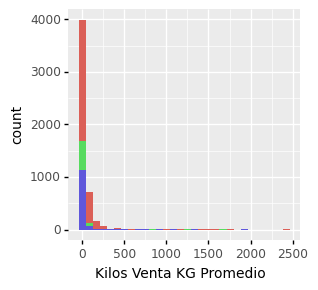

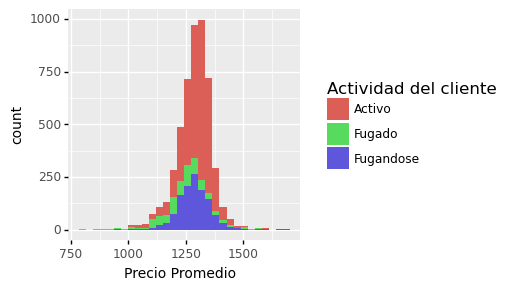

[<ggplot: (139052969442)>, <ggplot: (139052723993)>]

In [24]:
Y_G='Precio Promedio'
X_G='Kilos Venta KG Promedio'
Hist_Estado_R=[(
    ggplot(
     R_FM_Func.DF_Estado_R(Data_Customers_Full)
    ,aes(x= X_G
        # ,y=after_stat('width*density')
        # ,fill='Segmento'
        ,fill='Actividad del cliente'
         ))
    
    + geom_histogram(bins=30,alpha=1)
#      +scale_x_discrete(breaks= range(0,1100))
    # + scale_y_continuous(labels=percent_format()) # display labels as a percentage
       
    # +xlab('Ingresos en Miles de CLP')
    # +ylab('Porcentaje  de '+['Clientes','Facturaciones','Clientes'][i])
    # +ggtitle(List_Title[i])
    
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
            legend_position='none',
            figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
    
    )#theme
    
    
#         +scale_x_continuous(labels =  "{:,.1f}".format
#                         breaks =range(0,1750,250)                            )

),
(
    ggplot(
     R_FM_Func.DF_Estado_R(Data_Customers_Full)
    ,aes(x= Y_G
        # ,y=after_stat('width*density')
        # ,fill='Segmento'
        ,fill='Actividad del cliente'
         ))
    
    + geom_histogram(bins=30,alpha=1)
#      +scale_x_discrete(breaks= range(0,1100))
    # + scale_y_continuous(labels=percent_format()) # display labels as a percentage
       
    # +xlab('Ingresos en Miles de CLP')
    # +ylab('Porcentaje  de '+['Clientes','Facturaciones','Clientes'][i])
    # +ggtitle(List_Title[i])
    
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
            # legend_position='none',
            figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
    
    )#theme
    
    
#         +scale_x_continuous(labels =  "{:,.1f}".format
#                         breaks =range(0,1750,250)                            )

)
]
Hist_Estado_R

#### PDF

In [25]:
# Sabe pdf
# ```python
#============================
# Histograma Precio
#============================
file_name=('Histo r+ Precio y KG mean Cliente')
    
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\"

start_time = time.time()
save_as_pdf_pages(
                  
                  Hist_Estado_R
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

c:\Users\rolft\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\rolft\Documents\Repositorios\Graficos\Canal Tradicional\1010078\Cluster\\Histo r+ Precio y KG mean Cliente.pdf


Time Lapsed = 0:0:1.4996402263641357 
 H:m:s


# K-means

## Clustering

#### R_FM como dicionario para rediriguir según la actividad
`R_FM_Customers`


In [26]:
R_FM_Customers={
    'Activo':RFM_Customers[RFM_Customers['Actividad del cliente']=='Activo']
    ,'Fugandose':RFM_Customers[RFM_Customers['Actividad del cliente']=='Fugandose']
    ,'Fugando':RFM_Customers[RFM_Customers['Actividad del cliente']=='Fugado']
}
for a in R_FM_Customers.keys(): print(a ,R_FM_Customers[a].shape)

Activo (3222, 8)
Fugandose (1232, 8)
Fugando (619, 8)


#### Curva K-means
`R_FM_Func.Curva_kmeans`


 Activo


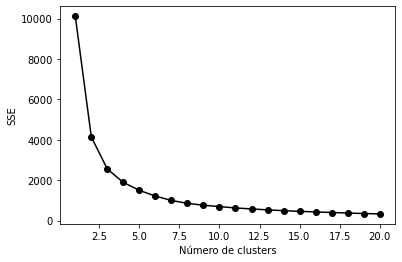


 Fugandose


c:\Users\rolft\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.


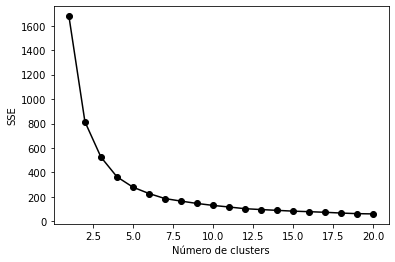


 Fugando


c:\Users\rolft\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.


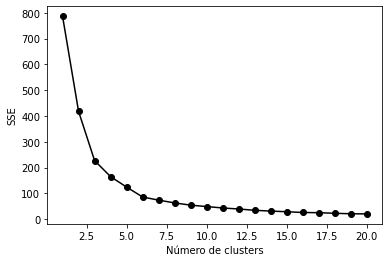

In [27]:
Col_FM=['Frecuency Actual del Cliente', 'Monetary Actual']
for a in R_FM_Customers.keys(): 
    print('\n',a)
    R_FM_Func.Curva_kmeans(
    R_FM_Customers[a],
    [c + ' (Escala ln)'+' (Normalizado)' for c in Col_FM]
     +['$(F \times W_F + M \times W_M)$']
    )[0]

### Clustering 
`R_FM_Func.def_Col_cluster`

In [28]:
Col_FM=['Frecuency Actual del Cliente', 'Monetary Actual']
A_Clust=[]
for i in R_FM_Customers.keys():
    R_FM_Customers[i]=\
      R_FM_Func.def_Col_cluster(
       R_FM_Customers[i] 
            ,[c + ' (Escala ln)'+' (Normalizado)' for c in Col_FM]
            +['$(F \times W_F + M \times W_M)$']
        ,5)
R_FM_Customers['Activo'].head()

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala ln) (Normalizado),Monetary Actual (Escala ln) (Normalizado),$(F \times W_F + M \times W_M)$,identified_clusters,F-1
1,10007508,0,0.201752,117683.471154,Activo,1.839562,1.409578,2.262435,3,4.956570
2,10017269,3,0.059365,29699.448718,Activo,0.832022,-0.475164,0.689473,2,16.845022
3,10023880,47,0.039591,38390.000000,Activo,0.498378,-0.123821,0.461232,2,25.258465
4,10028999,32,0.017541,29060.307692,Activo,-0.172059,-0.504944,-0.323542,4,57.008334
6,10032204,5,0.007030,30206.000000,Activo,-0.925133,-0.452014,-1.060737,4,142.247750


# Descripción

### Data a usar
>A_rfm='Activo'
- `df_C_fact`

- `df_C_Customers`

#### Data Actividad
Se crean los Dataframe con más atributos
- `df_C_fact`
- `df_C_Customers`

In [29]:
A_rfm='Activo'
print(R_FM_Customers.keys())
R_FM_Customers[A_rfm].head(2)

dict_keys(['Activo', 'Fugandose', 'Fugando'])


,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala ln) (Normalizado),Monetary Actual (Escala ln) (Normalizado),$(F \times W_F + M \times W_M)$,identified_clusters,F-1
1,10007508,0,0.201752,117683.471154,Activo,1.839562,1.409578,2.262435,3,4.956570
2,10017269,3,0.059365,29699.448718,Activo,0.832022,-0.475164,0.689473,2,16.845022


In [30]:
#=================================
# Creo Dataframe con más valores
#=================================
print(A_rfm)
#----------------------------------------------------
# Dataframe de Facturaciones
df_C_fact=pd.merge(
    R_FM_Customers[A_rfm]
,data_rfm,how='left')
print('Facturas \n',df_C_fact.shape)
# print('Facturas \n', '; '.join( df_C_fact.columns.to_list()))
# ,df_C_fact.columns)

#----------------------------------------------------
# Dataframe de Cientes
print('-------------------------------' )
df_C_Customers=pd.merge(
    R_FM_Customers[A_rfm]
,Data_Customers_Full,how='left')
print('Atributos \n',df_C_Customers.shape)
# print('Atributos \n', '; '.join( df_C_Customers.columns.to_list()))


Activo
Facturas 
 (180375, 33)
-------------------------------
Atributos 
 (3222, 30)


In [31]:
df_C_Customers.describe()

,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Frecuency Actual del Cliente (Escala ln) (Normalizado),Monetary Actual (Escala ln) (Normalizado),$(F \times W_F + M \times W_M)$,F-1,%△Valoración Promedio \n Tipo de Semana 0,%△Valoración Promedio \n Tipo de Semana 1,%△Valoración Promedio \n Tipo de Semana 2,...,Kilos Venta KG Promedio \n Tipo de Semana 3,Kilos Venta KG Promedio \n Tipo de Semana 4,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Ticket Promedio Actual,Ticket std Actual,Ticket CV Actual,$F^{-1}$ Actual
count,3222.000000,3222.000000,3.222000e+03,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,...,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000
mean,25.846369,0.064938,8.398265e+04,0.448868,0.191445,0.506302,44.703850,-0.016593,-0.021282,-0.018312,...,75.398726,76.565454,70.102741,1296.676481,2013.738361,109.569212,70.102741,32.095678,0.264503,44.703850
std,25.994297,0.071229,1.751840e+05,0.885554,1.100515,1.070687,45.089780,0.042393,0.052267,0.048756,...,181.984804,173.538614,161.903278,67.724598,5.256372,135.621220,161.903278,95.273881,0.270764,45.089780
min,0.000000,0.003137,2.420000e+04,-1.589588,-0.755473,-1.731458,2.166226,-0.209951,-0.248597,-0.214158,...,18.000000,18.000000,18.000000,893.484848,2007.000000,6.000000,18.000000,0.000000,0.000000,2.166226
25%,4.000000,0.015625,2.913429e+04,-0.267337,-0.501464,-0.389493,10.979255,-0.040365,-0.050580,-0.037369,...,22.000000,22.000000,22.000000,1262.129568,2007.000000,20.000000,22.000000,0.000000,0.000000,10.979255
50%,14.000000,0.033469,3.211001e+04,0.360041,-0.368339,0.361138,29.878182,-0.010162,-0.012585,-0.007353,...,22.833333,23.411224,24.262533,1305.000000,2014.000000,47.000000,24.262533,6.957011,0.269434,29.878182
75%,46.000000,0.091081,6.250627e+04,1.184561,0.543457,1.392497,64.000000,0.012226,0.014395,0.011552,...,52.199123,55.000000,47.936873,1338.160173,2019.000000,155.000000,47.936873,21.118058,0.428795,64.000000
max,90.000000,0.461632,2.754333e+06,2.521275,5.725500,3.472428,318.729413,0.241900,0.317085,0.149134,...,2481.500000,2221.000000,2443.104839,1690.000000,2021.000000,1088.000000,2443.104839,2006.682865,2.750346,318.729413


In [32]:
df_C_Customers.head()

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala ln) (Normalizado),Monetary Actual (Escala ln) (Normalizado),$(F \times W_F + M \times W_M)$,identified_clusters,F-1,...,Fecha ultima Compra,Fecha Creacion,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Ticket Promedio Actual,Ticket std Actual,Ticket CV Actual,$F^{-1}$ Actual
0,10007508,0,0.201752,117683.471154,Activo,1.839562,1.409578,2.262435,3,4.956570,...,2021-10-26,2018-03-01,93.158654,1266.894231,2007,464,93.158654,36.215256,0.388748,4.956570
1,10017269,3,0.059365,29699.448718,Activo,0.832022,-0.475164,0.689473,2,16.845022,...,2021-10-23,2018-01-27,22.038462,1347.782051,2007,101,22.038462,0.612474,0.027791,16.845022
2,10023880,47,0.039591,38390.000000,Activo,0.498378,-0.123821,0.461232,2,25.258465,...,2021-09-09,2018-12-28,27.500000,1400.000000,2007,383,27.500000,12.102631,0.440096,25.258465
3,10028999,32,0.017541,29060.307692,Activo,-0.172059,-0.504944,-0.323542,4,57.008334,...,2021-09-24,2019-11-05,22.000000,1320.923077,2007,62,22.000000,0.000000,0.000000,57.008334
4,10032204,5,0.007030,30206.000000,Activo,-0.925133,-0.452014,-1.060737,4,142.247750,...,2021-10-21,2020-08-24,22.000000,1373.000000,2020,12,22.000000,0.000000,0.000000,142.247750


#### Definición Semgento

Diccionario `RFM_Dic_Cluster`

1. Activo
    >0. segmento de alta frecuencia, Monetary Promedio
    >1. Semengo de alto poder adquisitivo
    >2. semegneot de frecuencia promedio, Monetary promedio 
    >3. segmento de alta frecuencua y Medio alto poder adquisitivo
    >4. semgento de baja frecuencia, poder adquisitvo promedio(Cliente oportunista)

In [33]:
RFM_Dic_Cluster={
    'Activo':[
        '$F$ Alto, ' +'$M$ Promedio'
        ,'$F$ Media Alto, ' +'$M$ Alto'
        ,'$F$ Promedio, ' +'$M$ Media Bajo'
        ,'$F$ Alto, ' +'$M$ Media Alto'
        ,'$F$ Bajo, ' +'$M$ Bajo'
    ]

}

In [34]:
print(A_rfm)
df_C_Customers['Segmento']=\
    df_C_Customers.identified_clusters.apply(lambda x: RFM_Dic_Cluster[A_rfm][int(x)]
                            )
df_C_Customers.head(1)

Activo


,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala ln) (Normalizado),Monetary Actual (Escala ln) (Normalizado),$(F \times W_F + M \times W_M)$,identified_clusters,F-1,...,Fecha Creacion,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Ticket Promedio Actual,Ticket std Actual,Ticket CV Actual,$F^{-1}$ Actual,Segmento
0,10007508,0,0.201752,117683.471154,Activo,1.839562,1.409578,2.262435,3,4.95657,...,2018-03-01,93.158654,1266.894231,2007,464,93.158654,36.215256,0.388748,4.95657,"$F$ Alto, $M$ Media Alto"


#### Data de para tabla o Grafico

NameError: name 'rfm_df' is not defined

In [37]:
#========================================================
# Data Frame con los atributos numericos de cada semgneto

#Data Frame copia de los cleintes
rfm_df=df_C_Customers.copy()

#=================================================
# Columna de Atributos que son numericos
df_colums=pd.DataFrame(rfm_df.dtypes).reset_index()
num_Col=df_colums[(df_colums[0]=='int64')
|(df_colums[0]=='float64')]['index'].to_list()
# num_Col
del df_colums


L_df_Col=list()
for c in num_Col: # Dic_col['RFM Customers']:
    L_df_Col.append(
    pd.DataFrame( 
        {'Valor': rfm_df[c].to_list()
        ,'Atributo':[c for i in range(rfm_df.shape[0])]
        ,'Segmento':rfm_df['Segmento']
        }
                )
    )
df_col=pd.concat(L_df_Col)
df_col.Valor=df_col.Valor.astype('float64')
df_col.head(2)

,Valor,Atributo,Segmento
0,0.0,Recency Actual,"$F$ Alto, $M$ Media Alto"
1,3.0,Recency Actual,"$F$ Promedio, $M$ Media Bajo"


## Tablas Descriptivas
>`df_C_fact`

>`df_C_Customers`

### Atributo segmetno

### Atributos RFM
pegar en latex post grafico des dispersion

In [38]:
rfm_df.columns

Index(['Cliente', 'Recency Actual', 'Frecuency Actual del Cliente',
       'Monetary Actual', 'Actividad del cliente',
       'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$', 'identified_clusters', 'F-1',
       '%△Valoración Promedio \n Tipo de Semana 0',
       '%△Valoración Promedio \n Tipo de Semana 1',
       '%△Valoración Promedio \n Tipo de Semana 2',
       '%△Valoración Promedio \n Tipo de Semana 3',
       '%△Valoración Promedio \n Tipo de Semana 4',
       'Kilos Venta KG Promedio \n Tipo de Semana 0',
       'Kilos Venta KG Promedio \n Tipo de Semana 1',
       'Kilos Venta KG Promedio \n Tipo de Semana 2',
       'Kilos Venta KG Promedio \n Tipo de Semana 3',
       'Kilos Venta KG Promedio \n Tipo de Semana 4', 'Fecha ultima Compra',
       'Fecha Creacion', 'Kilos Venta KG Promedio', 'Precio Promedio',
       'Año Creación Promedio', 'Frecuencia Historica Promedio',
   

In [39]:
rfm_df['Frecuency-1']=rfm_df[ Dic_col['RFM Customers'][1] ].apply(lambda x: x**(-1))

print\
(rfm_df[['Segmento', Dic_col['RFM Customers'][0] , 'Frecuency-1',Dic_col['RFM Customers'][2] 
        ,'$(F \times W_F + M \times W_M)$'  ] ]\
        .groupby('Segmento').mean().round(0).to_latex\
                (float_format="{:,.0f}".format))

# rfm_df['Frecuency-1']=rfm_df[ Dic_col['RFM Customers'][1] ].apply(lambda x: x**(-1))
rfm_df[['Segmento', Dic_col['RFM Customers'][0] , 'Frecuency-1',Dic_col['RFM Customers'][2] 
        ,'$(F \times W_F + M \times W_M)$'  ] ]\
        .groupby('Segmento').mean().round(0)

\begin{tabular}{lrrrr}
\toprule
{} &  Recency Actual &  Frecuency-1 &  Monetary Actual &  \$(F \textbackslash times W\_F + M \textbackslash times W\_M)\$ \\
Segmento                     &                 &              &                  &                                  \\
\midrule
\$F\$ Alto, \$M\$ Promedio       &              10 &           11 &           45,099 &                                1 \\
\$F\$ Media Alto, \$M\$ Alto     &              22 &           28 &          596,998 &                                2 \\
\$F\$ Promedio, \$M\$ Media Bajo &              27 &           36 &           35,750 &                                0 \\
\$F\$ Alto, \$M\$ Media Alto     &               7 &            8 &          127,444 &                                2 \\
\$F\$ Bajo, \$M\$ Bajo           &              46 &          100 &           29,885 &                               -1 \\
\bottomrule
\end{tabular}



,Recency Actual,Frecuency-1,Monetary Actual,$(F \times W_F + M \times W_M)$
Segmento,,,,
"$F$ Alto, $M$ Promedio",10.0,11.0,45099.0,1.0
"$F$ Media Alto, $M$ Alto",22.0,28.0,596998.0,2.0
"$F$ Promedio, $M$ Media Bajo",27.0,36.0,35750.0,0.0
"$F$ Alto, $M$ Media Alto",7.0,8.0,127444.0,2.0
"$F$ Bajo, $M$ Bajo",46.0,100.0,29885.0,-1.0


#### Descriptivo

In [40]:
# rfm_df=RFM_Customers.copy()
# Ac_T=pd.CategoricalDtype(categories=['Activo', 'Fugandose','Fugado'], ordered=True)
# rfm_df['Actividad del cliente']=pd.Series(rfm_df['Actividad del cliente'], dtype=Ac_T)

rfm_df['Frecuency-1']=rfm_df[ Dic_col['RFM Customers'][1] ].apply(lambda x: x**(-1))

#Listas
L_round=[0,0,0]
List_Tab=list()

for i in range(3):
#     i=1
    if(i==1):
        
        List_Tab.append(
        rfm_df[['Segmento', 'Frecuency-1' ]]\
        .groupby('Segmento').describe()\
        ['Frecuency-1'].reset_index()\
        .round(L_round[i]))

        List_Tab[i]['Atributo']=['Frecuency-1' for j in range(5)]
    else:    
        List_Tab.append(
        rfm_df[['Segmento', Dic_col['RFM Customers'][i] ]]\
        .groupby('Segmento').describe()\
        [Dic_col['RFM Customers'][i]].reset_index()\
        .round(L_round[i]))
        List_Tab[i]['Atributo']=[Dic_col['RFM Customers'][i] for j in range(5)]
        
#     List_Tab[i]=List_Tab[i].drop(columns=['count'])
    List_Tab[i].set_index('Atributo')
# pd.concat(List_Tab  )
# List_Tab[0].set_index('Atributo')
print(pd.concat(List_Tab).set_index(['Atributo','Segmento']).to_latex\
          (float_format="{:,.0f}".format)
     
     )
pd.concat(List_Tab  ).set_index(['Atributo','Segmento'])

\begin{tabular}{llrrrrrrrr}
\toprule
                &                    &  count &    mean &     std &     min &     25\% &     50\% &     75\% &       max \\
Atributo & Segmento &        &         &         &         &         &         &         &           \\
\midrule
Recency Actual & \$F\$ Alto, \$M\$ Promedio &    680 &      10 &      16 &       0 &       3 &       4 &      11 &        89 \\
                & \$F\$ Media Alto, \$M\$ Alto &    197 &      22 &      23 &       0 &       5 &      11 &      35 &        88 \\
                & \$F\$ Promedio, \$M\$ Media Bajo &    922 &      27 &      23 &       0 &       7 &      21 &      43 &        90 \\
                & \$F\$ Alto, \$M\$ Media Alto &    480 &       7 &      11 &       0 &       1 &       4 &       6 &        74 \\
                & \$F\$ Bajo, \$M\$ Bajo &    943 &      46 &      26 &       0 &      26 &      47 &      68 &        90 \\
Frecuency-1 & \$F\$ Alto, \$M\$ Promedio &    680 &      11 &       5 &     

count      mean       std  \
Atributo        Segmento                                                  
Recency Actual  $F$ Alto, $M$ Promedio        680.0      10.0      16.0   
                $F$ Media Alto, $M$ Alto      197.0      22.0      23.0   
                $F$ Promedio, $M$ Media Bajo  922.0      27.0      23.0   
                $F$ Alto, $M$ Media Alto      480.0       7.0      11.0   
                $F$ Bajo, $M$ Bajo            943.0      46.0      26.0   
Frecuency-1     $F$ Alto, $M$ Promedio        680.0      11.0       5.0   
                $F$ Media Alto, $M$ Alto      197.0      28.0      23.0   
                $F$ Promedio, $M$ Media Bajo  922.0      36.0      12.0   
                $F$ Alto, $M$ Media Alto      480.0       8.0       5.0   
                $F$ Bajo, $M$ Bajo            943.0     100.0      45.0   
Monetary Actual $F$ Alto, $M$ Promedio        680.0   45099.0   14733.0   
                $F$ Media Alto, $M$ Alto      197.0  596998.0  441966.0   
                $F$ Promedio, $M$ Media Bajo  922.0   35750.0   16287.0   
                $F$ Alto, $M$ Media Alto      480.0  127444.0   54988.0   
                $F$ Bajo, $M$ Bajo            943.0   29885.0    6383.0   

                                                   min       25%       50%  \
Atributo        Segmento                                                     
Recency Actual  $F$ Alto, $M$ Promedio             0.0       3.0       4.0   
                $F$ Media Alto, $M$ Alto           0.0       5.0      11.0   
                $F$ Promedio, $M$ Media Bajo       0.0       7.0      21.0   
                $F$ Alto, $M$ Media Alto           0.0       1.0       4.0   
                $F$ Bajo, $M$ Bajo                 0.0      26.0      47.0   
Frecuency-1     $F$ Alto, $M$ Promedio             3.0       7.0      10.0   
                $F$ Media Alto, $M$ Alto           4.0      13.0      22.0   
                $F$ Promedio, $M$ Media Bajo      16.0      27.0      35.0   
                $F$ Alto, $M$ Media Alto           2.0       5.0       7.0   
                $F$ Bajo, $M$ Bajo                52.0      68.0      86.0   
Monetary Actual $F$ Alto, $M$ Promedio         27940.0   32833.0   41486.0   
                $F$ Media Alto, $M$ Alto      158212.0  268488.0  433333.0   
                $F$ Promedio, $M$ Media Bajo   25300.0   29178.0   30349.0   
                $F$ Alto, $M$ Media Alto       49157.0   84227.0  115467.0   
                $F$ Bajo, $M$ Bajo             24200.0   27563.0   28556.0   

                                                   75%        max  
Atributo        Segmento                                           
Recency Actual  $F$ Alto, $M$ Promedio            11.0       89.0  
                $F$ Media Alto, $M$ Alto          35.0       88.0  
                $F$ Promedio, $M$ Media Bajo      43.0       90.0  
                $F$ Alto, $M$ Media Alto           6.0       74.0  
                $F$ Bajo, $M$ Bajo                68.0       90.0  
Frecuency-1     $F$ Alto, $M$ Promedio            13.0       30.0  
                $F$ Media Alto, $M$ Alto          39.0      161.0  
                $F$ Promedio, $M$ Media Bajo      45.0       96.0  
                $F$ Alto, $M$ Media Alto          10.0       33.0  
                $F$ Bajo, $M$ Bajo               116.0      319.0  
Monetary Actual $F$ Alto, $M$ Promedio         53616.0   112013.0  
                $F$ Media Alto, $M$ Alto      846161.0  2754333.0  
                $F$ Promedio, $M$ Media Bajo   33712.0   164363.0  
                $F$ Alto, $M$ Media Alto      158100.0   356776.0  
                $F$ Bajo, $M$ Bajo             29985.0   128182.0

In [41]:
# rfm_df=RFM_Customers.copy()
# Ac_T=pd.CategoricalDtype(categories=['Activo', 'Fugandose','Fugado'], ordered=True)
# rfm_df['Actividad del cliente']=pd.Series(rfm_df['Actividad del cliente'], dtype=Ac_T)

rfm_df['Frecuency-1']=rfm_df[ Dic_col['RFM Customers'][1] ].apply(lambda x: x**(-1))

#Listas
L_round=[0,0,0]
List_Tab=list()

for i in range(3):
#     i=1
    if(i==1):
        
        List_Tab.append(
        rfm_df[['Segmento', 'Frecuency-1' ]]\
        .groupby('Segmento').mean()\
        ['Frecuency-1'].reset_index()\
        .round(L_round[i]))
        List_Tab[i]['Atributo']=['Frecuency-1' for j in range(5)]
        List_Tab[i]=List_Tab[i].rename(columns={
                        'Frecuency-1':'Valor promedio'
                        })
    else:    
        List_Tab.append(
        rfm_df[['Segmento', Dic_col['RFM Customers'][i] ]]\
        .groupby('Segmento').mean()\
        [Dic_col['RFM Customers'][i]].reset_index()\
        .round(L_round[i]))
        List_Tab[i]['Atributo']=[Dic_col['RFM Customers'][i] for j in range(5)]
        
#     List_Tab[i]=List_Tab[i].drop(columns=['count'])
    List_Tab[i].set_index('Atributo')
    List_Tab[i]=List_Tab[i].rename(columns={
                        Dic_col['RFM Customers'][i]:'Valor promedio'
                        })
# pd.concat(List_Tab  )
# List_Tab[0].set_index('Atributo')
print(pd.concat(List_Tab  ).set_index(['Atributo','Segmento']).T.to_latex\
          (float_format="{:,.0f}".format)
     
     )
pd.concat(List_Tab  ).set_index(['Atributo','Segmento'])

\begin{tabular}{lrrrrrrrrrrrrrrr}
\toprule
Atributo & \multicolumn{5}{l}{Recency Actual} & \multicolumn{5}{l}{Frecuency-1} & \multicolumn{5}{l}{Monetary Actual} \\
Segmento & \$F\$ Alto, \$M\$ Promedio & \$F\$ Media Alto, \$M\$ Alto & \$F\$ Promedio, \$M\$ Media Bajo & \$F\$ Alto, \$M\$ Media Alto & \$F\$ Bajo, \$M\$ Bajo & \$F\$ Alto, \$M\$ Promedio & \$F\$ Media Alto, \$M\$ Alto & \$F\$ Promedio, \$M\$ Media Bajo & \$F\$ Alto, \$M\$ Media Alto & \$F\$ Bajo, \$M\$ Bajo & \$F\$ Alto, \$M\$ Promedio & \$F\$ Media Alto, \$M\$ Alto & \$F\$ Promedio, \$M\$ Media Bajo & \$F\$ Alto, \$M\$ Media Alto & \$F\$ Bajo, \$M\$ Bajo \\
\midrule
Valor promedio &                     10 &                       22 &                           27 &                        7 &                 46 &                     11 &                       28 &                           36 &                        8 &                100 &                 45,099 &                  596,998 &                       35,750 & 

Valor promedio
Atributo        Segmento                                    
Recency Actual  $F$ Alto, $M$ Promedio                  10.0
                $F$ Media Alto, $M$ Alto                22.0
                $F$ Promedio, $M$ Media Bajo            27.0
                $F$ Alto, $M$ Media Alto                 7.0
                $F$ Bajo, $M$ Bajo                      46.0
Frecuency-1     $F$ Alto, $M$ Promedio                  11.0
                $F$ Media Alto, $M$ Alto                28.0
                $F$ Promedio, $M$ Media Bajo            36.0
                $F$ Alto, $M$ Media Alto                 8.0
                $F$ Bajo, $M$ Bajo                     100.0
Monetary Actual $F$ Alto, $M$ Promedio               45099.0
                $F$ Media Alto, $M$ Alto            596998.0
                $F$ Promedio, $M$ Media Bajo         35750.0
                $F$ Alto, $M$ Media Alto            127444.0
                $F$ Bajo, $M$ Bajo                   29885.0

### General

In [42]:
df_C_Customers.groupby('Segmento').mean().T

Segmento,"$F$ Alto, $M$ Promedio","$F$ Media Alto, $M$ Alto","$F$ Promedio, $M$ Media Bajo","$F$ Alto, $M$ Media Alto","$F$ Bajo, $M$ Bajo"
Recency Actual,10.377941,21.964467,27.415401,6.608333,46.069989
Frecuency Actual del Cliente,0.115756,0.060402,0.030986,0.164870,0.011571
Monetary Actual,45098.851895,596997.511585,35750.447022,127444.089997,29884.729700
Frecuency Actual del Cliente (Escala ln) (Normalizado),1.294043,0.625515,0.247430,1.561513,-0.566892
Monetary Actual (Escala ln) (Normalizado),0.032287,3.313593,-0.297509,1.401948,-0.484124
$(F \times W_F + M \times W_M)$,1.303729,1.619593,0.158178,1.982098,-0.712130
F-1,10.614532,28.406389,36.284178,8.134845,99.536720
%△Valoración Promedio \n Tipo de Semana 0,0.004518,-0.018422,-0.019789,0.012126,-0.042929
%△Valoración Promedio \n Tipo de Semana 1,0.002296,-0.021247,-0.027350,0.015319,-0.050989
%△Valoración Promedio \n Tipo de Semana 2,-0.000065,-0.022778,-0.020922,0.012308,-0.043571


## Grafica de dispersion

### Grafica M F

In [43]:
# a=list(R_FM_Customers.keys())[0]
# rfm_clust_x=R_FM_Customers[A_rfm].copy()
rfm_clust_x=df_C_Customers.copy()
print(rfm_clust_x['Actividad del cliente'].unique()[0])

Activo


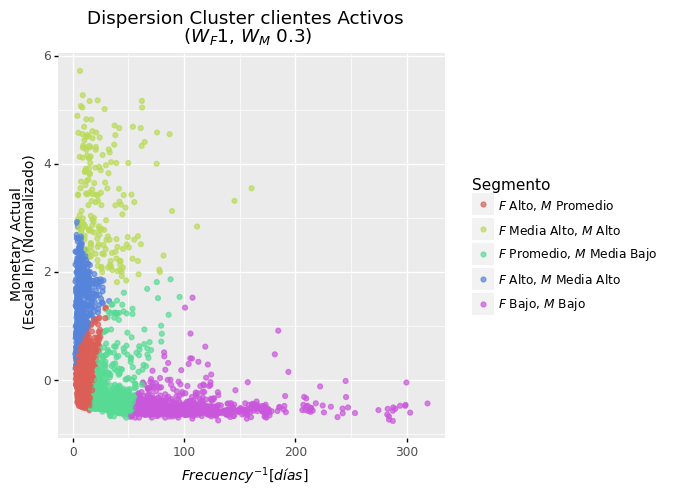

<ggplot: (139054094794)>

In [44]:
rfm_clust_x['Monetary Actual \n en Millones de CLP']=\
rfm_clust_x['Monetary Actual'].apply(lambda x: x/10**6)
rfm_clust_x['Cluster']=rfm_clust_x.identified_clusters.apply(lambda x:   'Segmento '+str(x) )
GGplot_rfm_x=\
(
    ggplot(
        #             rfm_clust
        rfm_clust_x
        , aes(y='Monetary Actual'+' (Escala ln) (Normalizado)'
        #                  'Monetary Actual \n en Millones de CLP',
            ,x='F-1'
            #'Frecuency Actual del Cliente'
            #'F-1'
             ,fill='Segmento'
            ,color='Segmento'
                     ))\
        #                 + labs(y='Disposición a pagar')\
            + geom_point(
        #         aes(color='Cluster de Clientes'),
                alpha=0.7)\
        #                 +geom_smooth()\
        #                 +ggtitle(('Dispersión Clusters Clientes'+
        #                           ' \n Disposición a pagar v/s '+
        #                          'Cluster de Semana'))\
        +ylab('Monetary Actual'+'\n'+' (Escala ln) (Normalizado)')
        +xlab('$Frecuency^{-1} [días]$')
        +ggtitle('Dispersion Cluster clientes '+
                rfm_clust_x['Actividad del cliente'].unique()[0]+'s'+
                 '\n ($W_F $'+str(w_f)+', $W_M$ '+str(w_m) +')'
                 )
        +theme(
            # axis_text_x = element_text(angle=90, hjust=1)
            figure_size=(5,5),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            )\


    )
GGplot_rfm_x

Frecuency Actual del Cliente
Monetary Actual


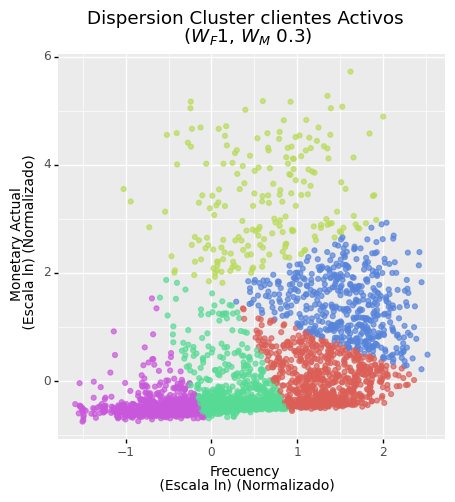

<ggplot: (139055256107)>

In [45]:
GGplot_rfm_FM=\
(
    ggplot(
        #             rfm_clust
        data_ln(rfm_clust_x, ['Frecuency Actual del Cliente',
                             'Monetary Actual'],False)
        , aes(y='Monetary Actual'+' (Escala ln) (Normalizado)'
        #                  'Monetary Actual \n en Millones de CLP',
            ,x='Frecuency Actual del Cliente'+' (Escala ln) (Normalizado)'
            #'F-1'
             ,fill='Segmento'
            ,color='Segmento'
                     ))\
        #                 + labs(y='Disposición a pagar')\
            + geom_point(
        #         aes(color='Cluster de Clientes'),
                alpha=0.7)\
        #                 +geom_smooth()\
        #                 +ggtitle(('Dispersión Clusters Clientes'+
        #                           ' \n Disposición a pagar v/s '+
        #                          'Cluster de Semana'))\
        +ylab('Monetary Actual'+'\n'+' (Escala ln) (Normalizado)')
        +xlab('Frecuency'+'\n'+' (Escala ln) (Normalizado)')
        +ggtitle('Dispersion Cluster clientes '+
                rfm_clust_x['Actividad del cliente'].unique()[0]+'s'+
                 '\n ($W_F $'+str(w_f)+', $W_M$ '+str(w_m) +')'
                 )
        +theme(
            # axis_text_x = element_text(angle=90, hjust=1)
            legend_position='none'
            ,figure_size=(5,5),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            )\


    )
GGplot_rfm_FM

#### Save

In [46]:
Png_file_direct_Graphic_Canal_Material+"\\Cluster\\RFM"

'C:\\Users\\rolft\\Documents\\Repositorios\\Graficos\\Canal Tradicional\\1010078\\Cluster\\RFM'

In [47]:
# ```python
#============================
# W_F y W_F con la dispersion de los clusters generados
#============================
file_name=('Clusters r+fm Activo W Disp')
    
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\RFM"

start_time = time.time()
save_as_pdf_pages(
                  
                  [ GGplot_rfm_FM, GGplot_rfm_x  ]
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

c:\Users\rolft\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\rolft\Documents\Repositorios\Graficos\Canal Tradicional\1010078\Cluster\RFM\Clusters r+fm Activo W Disp.pdf


Time Lapsed = 0:0:3.238133430480957 
 H:m:s


### Grafica P Q

In [48]:
# a=list(R_FM_Customers.keys())[0]
# rfm_clust_x=R_FM_Customers[A_rfm].copy()
rfm_clust_x=df_C_Customers.copy()
print(rfm_clust_x['Actividad del cliente'].unique()[0])

Activo


In [49]:
rfm_clust_x.columns

Index(['Cliente', 'Recency Actual', 'Frecuency Actual del Cliente',
       'Monetary Actual', 'Actividad del cliente',
       'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$', 'identified_clusters', 'F-1',
       '%△Valoración Promedio \n Tipo de Semana 0',
       '%△Valoración Promedio \n Tipo de Semana 1',
       '%△Valoración Promedio \n Tipo de Semana 2',
       '%△Valoración Promedio \n Tipo de Semana 3',
       '%△Valoración Promedio \n Tipo de Semana 4',
       'Kilos Venta KG Promedio \n Tipo de Semana 0',
       'Kilos Venta KG Promedio \n Tipo de Semana 1',
       'Kilos Venta KG Promedio \n Tipo de Semana 2',
       'Kilos Venta KG Promedio \n Tipo de Semana 3',
       'Kilos Venta KG Promedio \n Tipo de Semana 4', 'Fecha ultima Compra',
       'Fecha Creacion', 'Kilos Venta KG Promedio', 'Precio Promedio',
       'Año Creación Promedio', 'Frecuencia Historica Promedio',
   

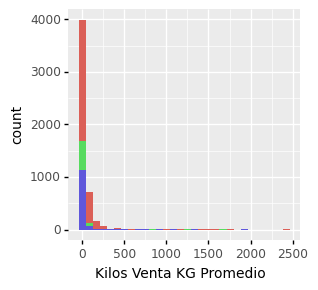

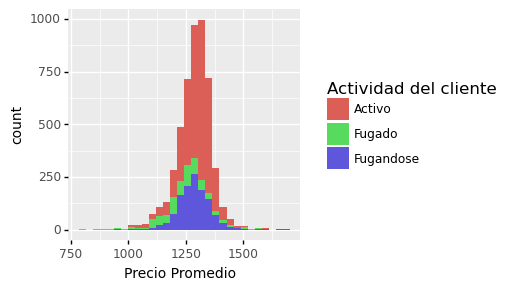

[<ggplot: (139058878724)>, <ggplot: (139058878802)>]

In [50]:
Y_G='Precio Promedio'
X_G='Kilos Venta KG Promedio'
Hist_Estado_R=[(
    ggplot(
     R_FM_Func.DF_Estado_R(Data_Customers_Full)
    ,aes(x= X_G
        # ,y=after_stat('width*density')
        # ,fill='Segmento'
        ,fill='Actividad del cliente'
         ))
    
    + geom_histogram(bins=30,alpha=1)
#      +scale_x_discrete(breaks= range(0,1100))
    # + scale_y_continuous(labels=percent_format()) # display labels as a percentage
       
    # +xlab('Ingresos en Miles de CLP')
    # +ylab('Porcentaje  de '+['Clientes','Facturaciones','Clientes'][i])
    # +ggtitle(List_Title[i])
    
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
            legend_position='none',
            figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
    
    )#theme
    
    
#         +scale_x_continuous(labels =  "{:,.1f}".format
#                         breaks =range(0,1750,250)                            )

),
(
    ggplot(
     R_FM_Func.DF_Estado_R(Data_Customers_Full)
    ,aes(x= Y_G
        # ,y=after_stat('width*density')
        # ,fill='Segmento'
        ,fill='Actividad del cliente'
         ))
    
    + geom_histogram(bins=30,alpha=1)
#      +scale_x_discrete(breaks= range(0,1100))
    # + scale_y_continuous(labels=percent_format()) # display labels as a percentage
       
    # +xlab('Ingresos en Miles de CLP')
    # +ylab('Porcentaje  de '+['Clientes','Facturaciones','Clientes'][i])
    # +ggtitle(List_Title[i])
    
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
            # legend_position='none',
            figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
    
    )#theme
    
    
#         +scale_x_continuous(labels =  "{:,.1f}".format
#                         breaks =range(0,1750,250)                            )

)
]
Hist_Estado_R

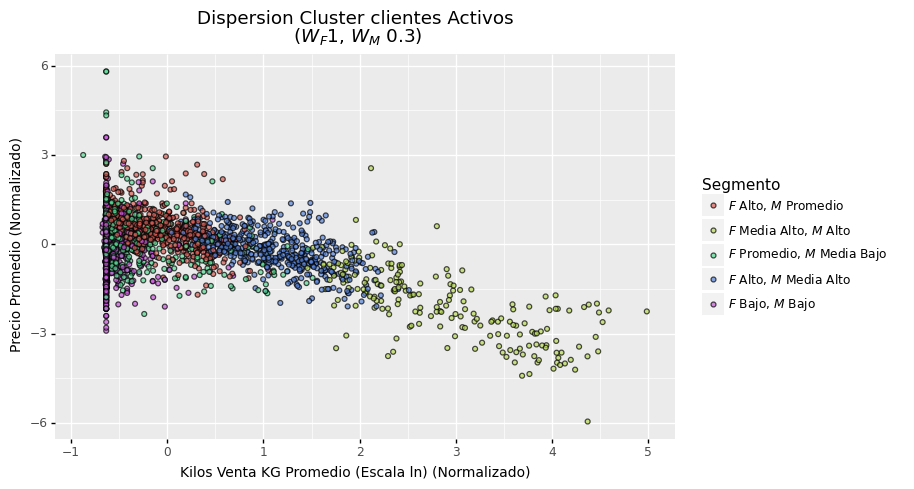

<ggplot: (139058939450)>

In [51]:
Y_G='Precio Promedio'
X_G='Kilos Venta KG Promedio'
(
    ggplot(
        R_FM_Func.data_Norm_satandar( R_FM_Func.data_ln(rfm_clust_x,[X_G],False)
                                    ,[c+' (Escala ln)' for c in [X_G]] + [Y_G] ,False)
        #+' (Escala ln)'
        , aes(y=Y_G+' (Normalizado)'
            ,x=X_G+' (Escala ln)'+' (Normalizado)'
             ,fill='Segmento'
            # ,color='Segmento'
                     ))\
        #                 + labs(y='Disposición a pagar')\
            + geom_point(
        #         aes(color='Cluster de Clientes'),
                alpha=0.7)\
        #                 +geom_smooth()\
        #                 +ggtitle(('Dispersión Clusters Clientes'+
        #                           ' \n Disposición a pagar v/s '+
        #                          'Cluster de Semana'))\
        # +ylab('Monetary Actual'+'\n'+' (Escala ln) (Normalizado)')
        # +xlab('Frecuency'+'\n'+' (Escala ln) (Normalizado)')
        +ggtitle('Dispersion Cluster clientes '+
                rfm_clust_x['Actividad del cliente'].unique()[0]+'s'+
                 '\n ($W_F $'+str(w_f)+', $W_M$ '+str(w_m) +')'
                 )
        +theme(
            # axis_text_x = element_text(angle=0, hjust=0)
            figure_size=(8,5),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
                )


    )


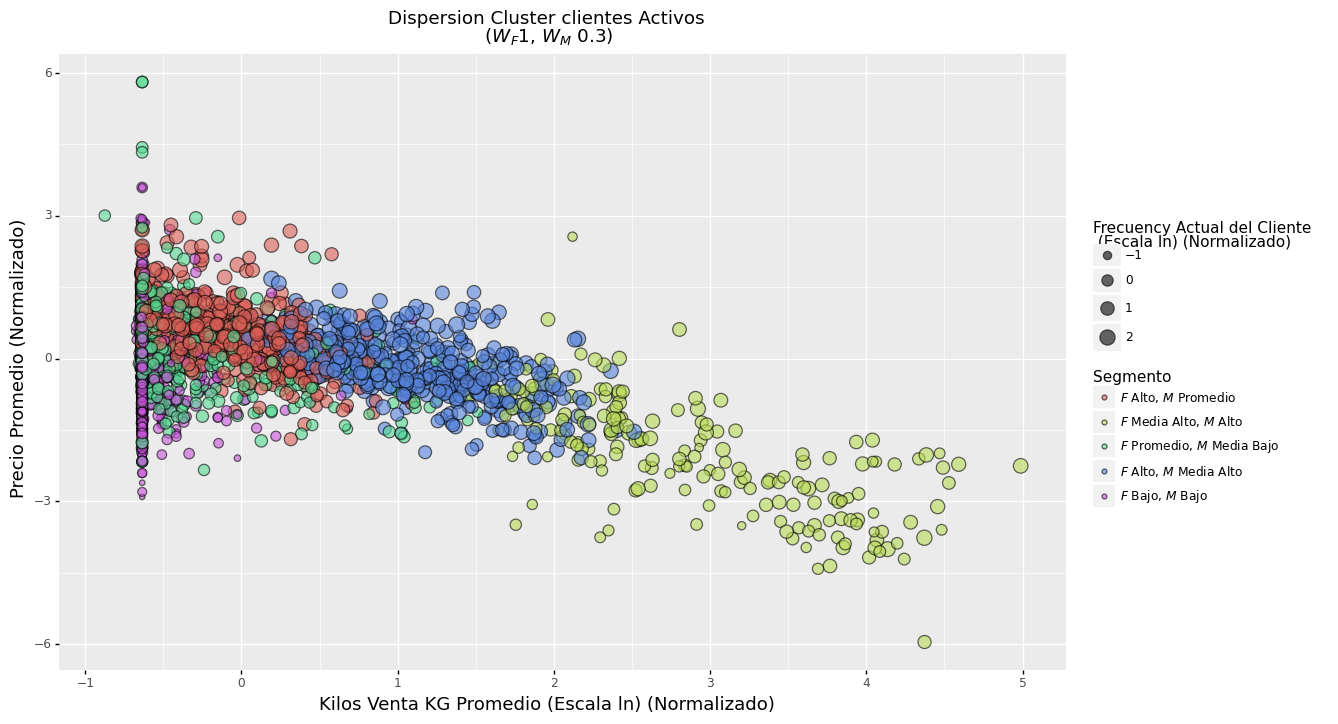

<ggplot: (139058843724)>

In [52]:
Y_G='Precio Promedio'
X_G='Kilos Venta KG Promedio'
rfm_clust_x['Frecuency Actual del Cliente'+'\n (Escala ln) (Normalizado)']=\
    rfm_clust_x['Frecuency Actual del Cliente'+' (Escala ln) (Normalizado)']
Z_G='Frecuency Actual del Cliente'
G_PQ_Clusters=(
    ggplot(
        R_FM_Func.data_Norm_satandar( R_FM_Func.data_ln(rfm_clust_x,[X_G,Z_G],False)
                                    ,[c+' (Escala ln)' for c in [X_G]] + [Y_G] ,False)
        #+' (Escala ln)'
        , aes(y=Y_G+' (Normalizado)'
            ,x=X_G+' (Escala ln)'+' (Normalizado)'
             ,fill='Segmento'
            # ,color='Segmento'
                     ))\
        #                 + labs(y='Disposición a pagar')\
            + geom_point(
                aes( size= Z_G +'\n (Escala ln) (Normalizado)'),
                #+' (Escala ln)'),
                # 'F-1'),
                # 'Frecuency Actual del Cliente'+'\n (Escala ln) (Normalizado)'),
                   
                    alpha=0.6)\
        #                 +geom_smooth()\
        #                 +ggtitle(('Dispersión Clusters Clientes'+
        #                           ' \n Disposición a pagar v/s '+
        #                          'Cluster de Semana'))\
        # +ylab('Monetary Actual'+'\n'+' (Escala ln) (Normalizado)')
        # +xlab('Frecuency'+'\n'+' (Escala ln) (Normalizado)')
        +ggtitle('Dispersion Cluster clientes '+
                rfm_clust_x['Actividad del cliente'].unique()[0]+'s'+
                 '\n ($W_F $'+str(w_f)+', $W_M$ '+str(w_m) +')'
                 )
        +theme(
            # axis_text_x = element_text(angle=0, hjust=0)
            figure_size=(13,8),
            axis_title_x=element_text(size = 13),
            axis_title_y=element_text(size = 13),
                )


    )
G_PQ_Clusters

In [53]:
Png_file_direct_Graphic_Canal_Material+"\\Cluster\\RFM"

'C:\\Users\\rolft\\Documents\\Repositorios\\Graficos\\Canal Tradicional\\1010078\\Cluster\\RFM'

### SAVE

In [54]:
# ```python
#============================
# W_F y W_F con la dispersion de los clusters generados
#============================
file_name=('Disp PQ Clusters r+fm Activo')
    
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\RFM"

start_time = time.time()
save_as_pdf_pages(
                  
                  [ G_PQ_Clusters ]
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

c:\Users\rolft\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\rolft\Documents\Repositorios\Graficos\Canal Tradicional\1010078\Cluster\RFM\Disp PQ Clusters r+fm Activo.pdf


Time Lapsed = 0:0:1.8189527988433838 
 H:m:s


# Puntuación del cluster
## Ridge Regresion

Se busca considerar el coeficiente que acompaña a cada segmento de clientes, para decidir que segmento es el que representa un aumento del precio

In [55]:
data_rfm
for a in R_FM_Customers.keys():
    print(R_FM_Func.Func_log_log_Tip_ind_cluster(pd.merge(R_FM_Customers[a],data_rfm,how='left'),True))

(0.473, 0.463)
(0.446, 0.45)
(0.417, 0.464)
